In [4]:
import os
import torch
import torchvision
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
try:
    import xml.etree.cElementTree as ET
except ImportError:
    import xml.etree.ElementTree as ET

%matplotlib inline

In [5]:
root = '../datasets/pp_smoke'
xml_list = os.listdir(os.path.join(root, 'Annotations'))
_ = np.random.randint(len(xml_list))
xml_path = os.path.join(root, 'Annotations', xml_list[_])
img_path = os.path.join(root, 'images', xml_list[_].split('.')[0]+'.jpg')

xml_fp = ET.parse(xml_path)
objs = xml_fp.findall("object")
num_objs = len(objs)
size = (num_objs, int(xml_fp.find("size").find("height").text), int(xml_fp.find("size").find("width").text))
masks = np.zeros(size)
print(size)
print(masks.shape)

(1, 720, 1280)
(1, 720, 1280)


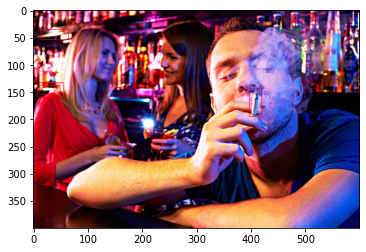

In [11]:
model = torch.load('model.pth')
_ = np.random.randint(len(xml_list))
img_path = os.path.join(root, 'images', xml_list[_].split('.')[0]+'.jpg')
img = Image.open(img_path)
img = np.array(img)
x = np.array(np.array(img))
x = torchvision.transforms.ToTensor()(x)
x = torch.as_tensor(x.reshape((1, x.shape[0], x.shape[1], x.shape[2])))
x = x.to("cuda")
y = model(x)
for box in y[0]['boxes']:
    box = box.to('cpu').detach().numpy()
    box = box.astype(np.int16)
    img = cv2.rectangle(img,(box[0],box[1]),(box[2],box[3]),(255,0,0))
plt.imshow(img)
torch.cuda.empty_cache()